# Voting Classification

## Importing the necessary libraries and packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    accuracy_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


## Exploratory Data Analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [4]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,1.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,1.000000,29.750000,43000.000000,0.000000
50%,2.000000,37.000000,70000.000000,0.000000
75%,2.000000,46.000000,88000.000000,1.000000
max,2.000000,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
estimators = [
    ("dtc", DecisionTreeClassifier()),
    ("rfc", RandomForestClassifier()),
    ("knnc", KNeighborsClassifier()),
]
voting = VotingClassifier(
    estimators=estimators,
    voting="soft",  # If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('knnc', KNeighborsClassifier())],
                 voting='soft')

In [11]:
for name, clf in voting.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

dtc = 0.925
rfc = 0.925
knnc = 0.825
rfc = 0.925
knnc = 0.825


In [12]:
y_pred = voting.predict(X_test)

In [13]:
voting_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Voting Classification :", voting_acc * 100, "%\n")  # type: ignore
print("Classification Report", "\n", classification_report(y_test, y_pred))

Accuracy of Voting Classification : 95.0 %

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40



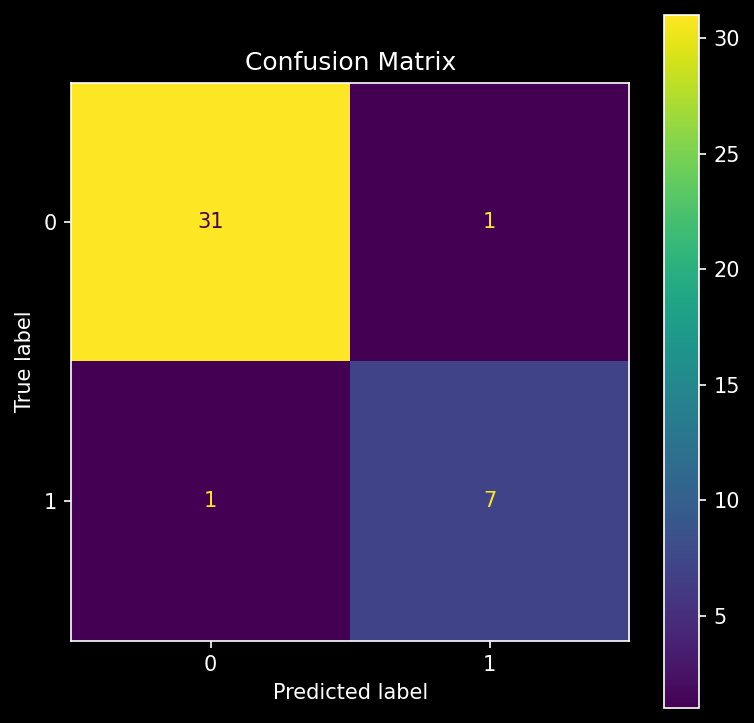

In [14]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(voting, X_test, y_test, ax=ax)
plt.title("Confusion Matrix")
plt.savefig("Images/Confusion_Matrix_Voting_Classification.png", bbox_inches="tight")

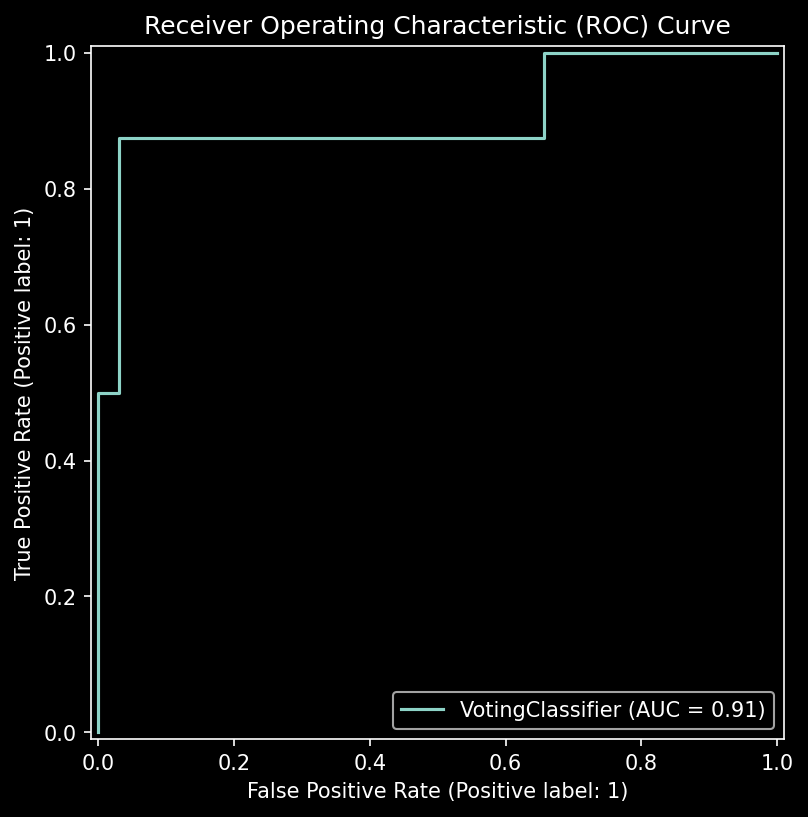

In [15]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
RocCurveDisplay.from_estimator(voting, X_test, y_test, ax=ax)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.savefig("Images/ROC_Curve_Voting_Classification.png", bbox_inches="tight")

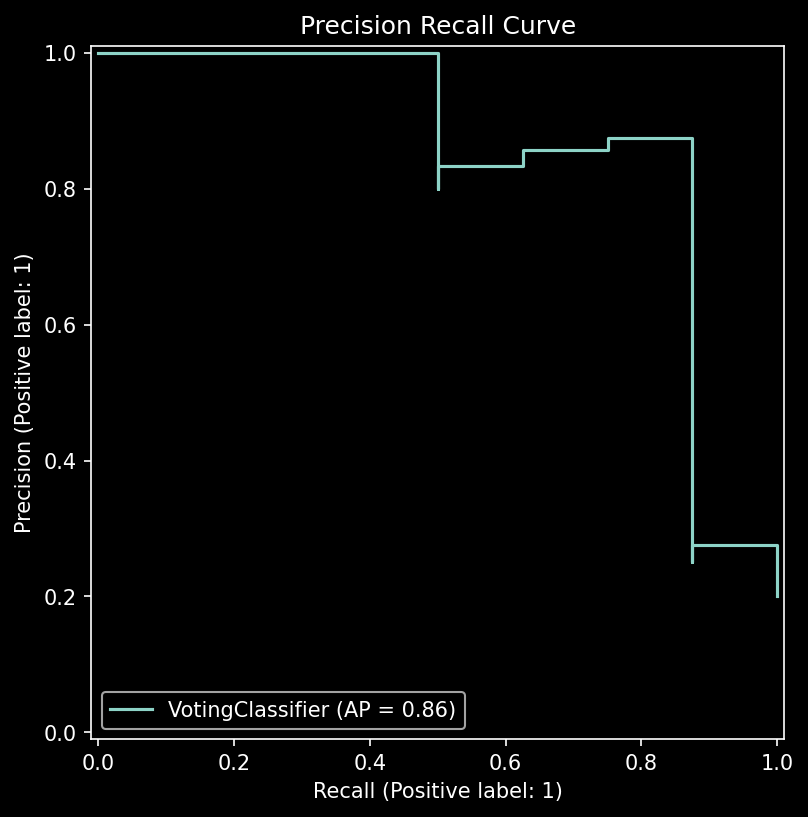

In [16]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
PrecisionRecallDisplay.from_estimator(voting, X_test, y_test, ax=ax)
plt.title("Precision Recall Curve")
plt.savefig(
    "Images/Precision_Recall_Curve_Voting_Classification.png", bbox_inches="tight"
)

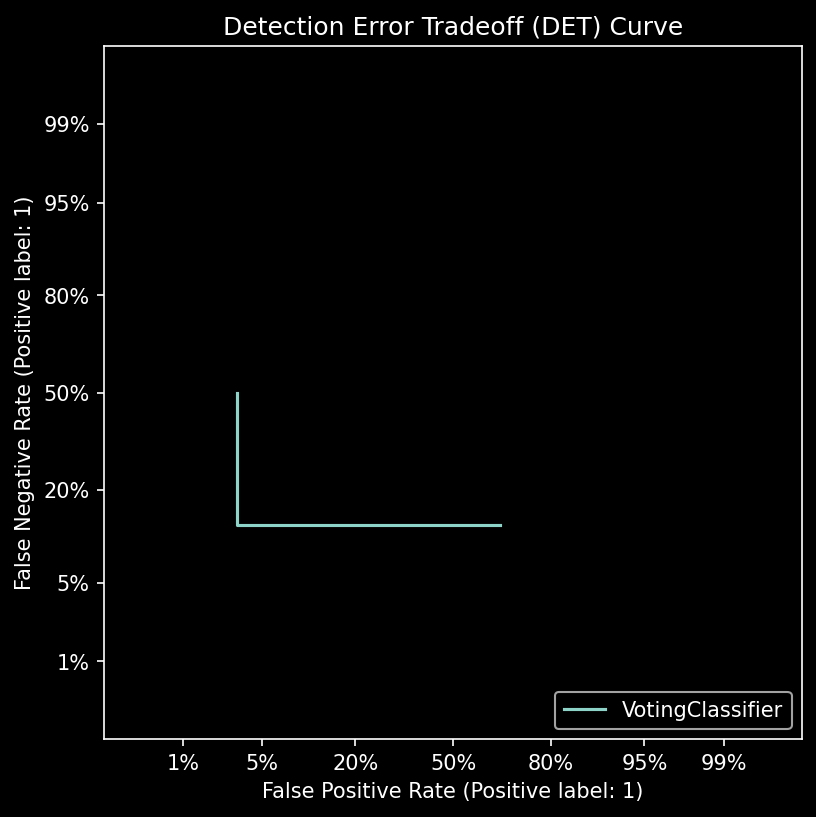

In [17]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
DetCurveDisplay.from_estimator(voting, X_test, y_test, ax=ax)
plt.title("Detection Error Tradeoff (DET) Curve")
plt.savefig("Images/DET_Curve_Voting_Classification.png", bbox_inches="tight")

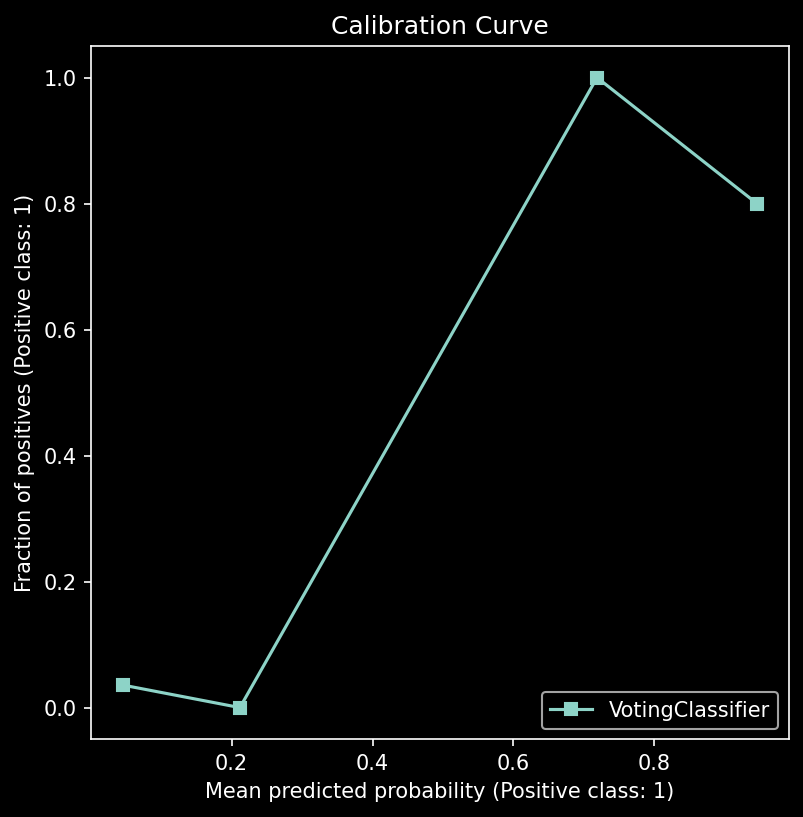

In [18]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
CalibrationDisplay.from_estimator(voting, X_test, y_test, ax=ax, ref_line=False)
plt.title("Calibration Curve")
plt.savefig("Images/Calibration_Curve_Voting_Classification.png", bbox_inches="tight")

In [19]:
dump(voting, "../../../Models/votingClassifier.joblib")

['../../../Models/votingClassifier.joblib']